# Explore here

In [2]:
# Your code here

import pandas as pd

# Cargar desde URL
url = 'https://raw.githubusercontent.com/4GeeksAcademy/decision-tree-project-tutorial/main/diabetes.csv'
df = pd.read_csv(url)

# Vista general
print(df.head())



   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


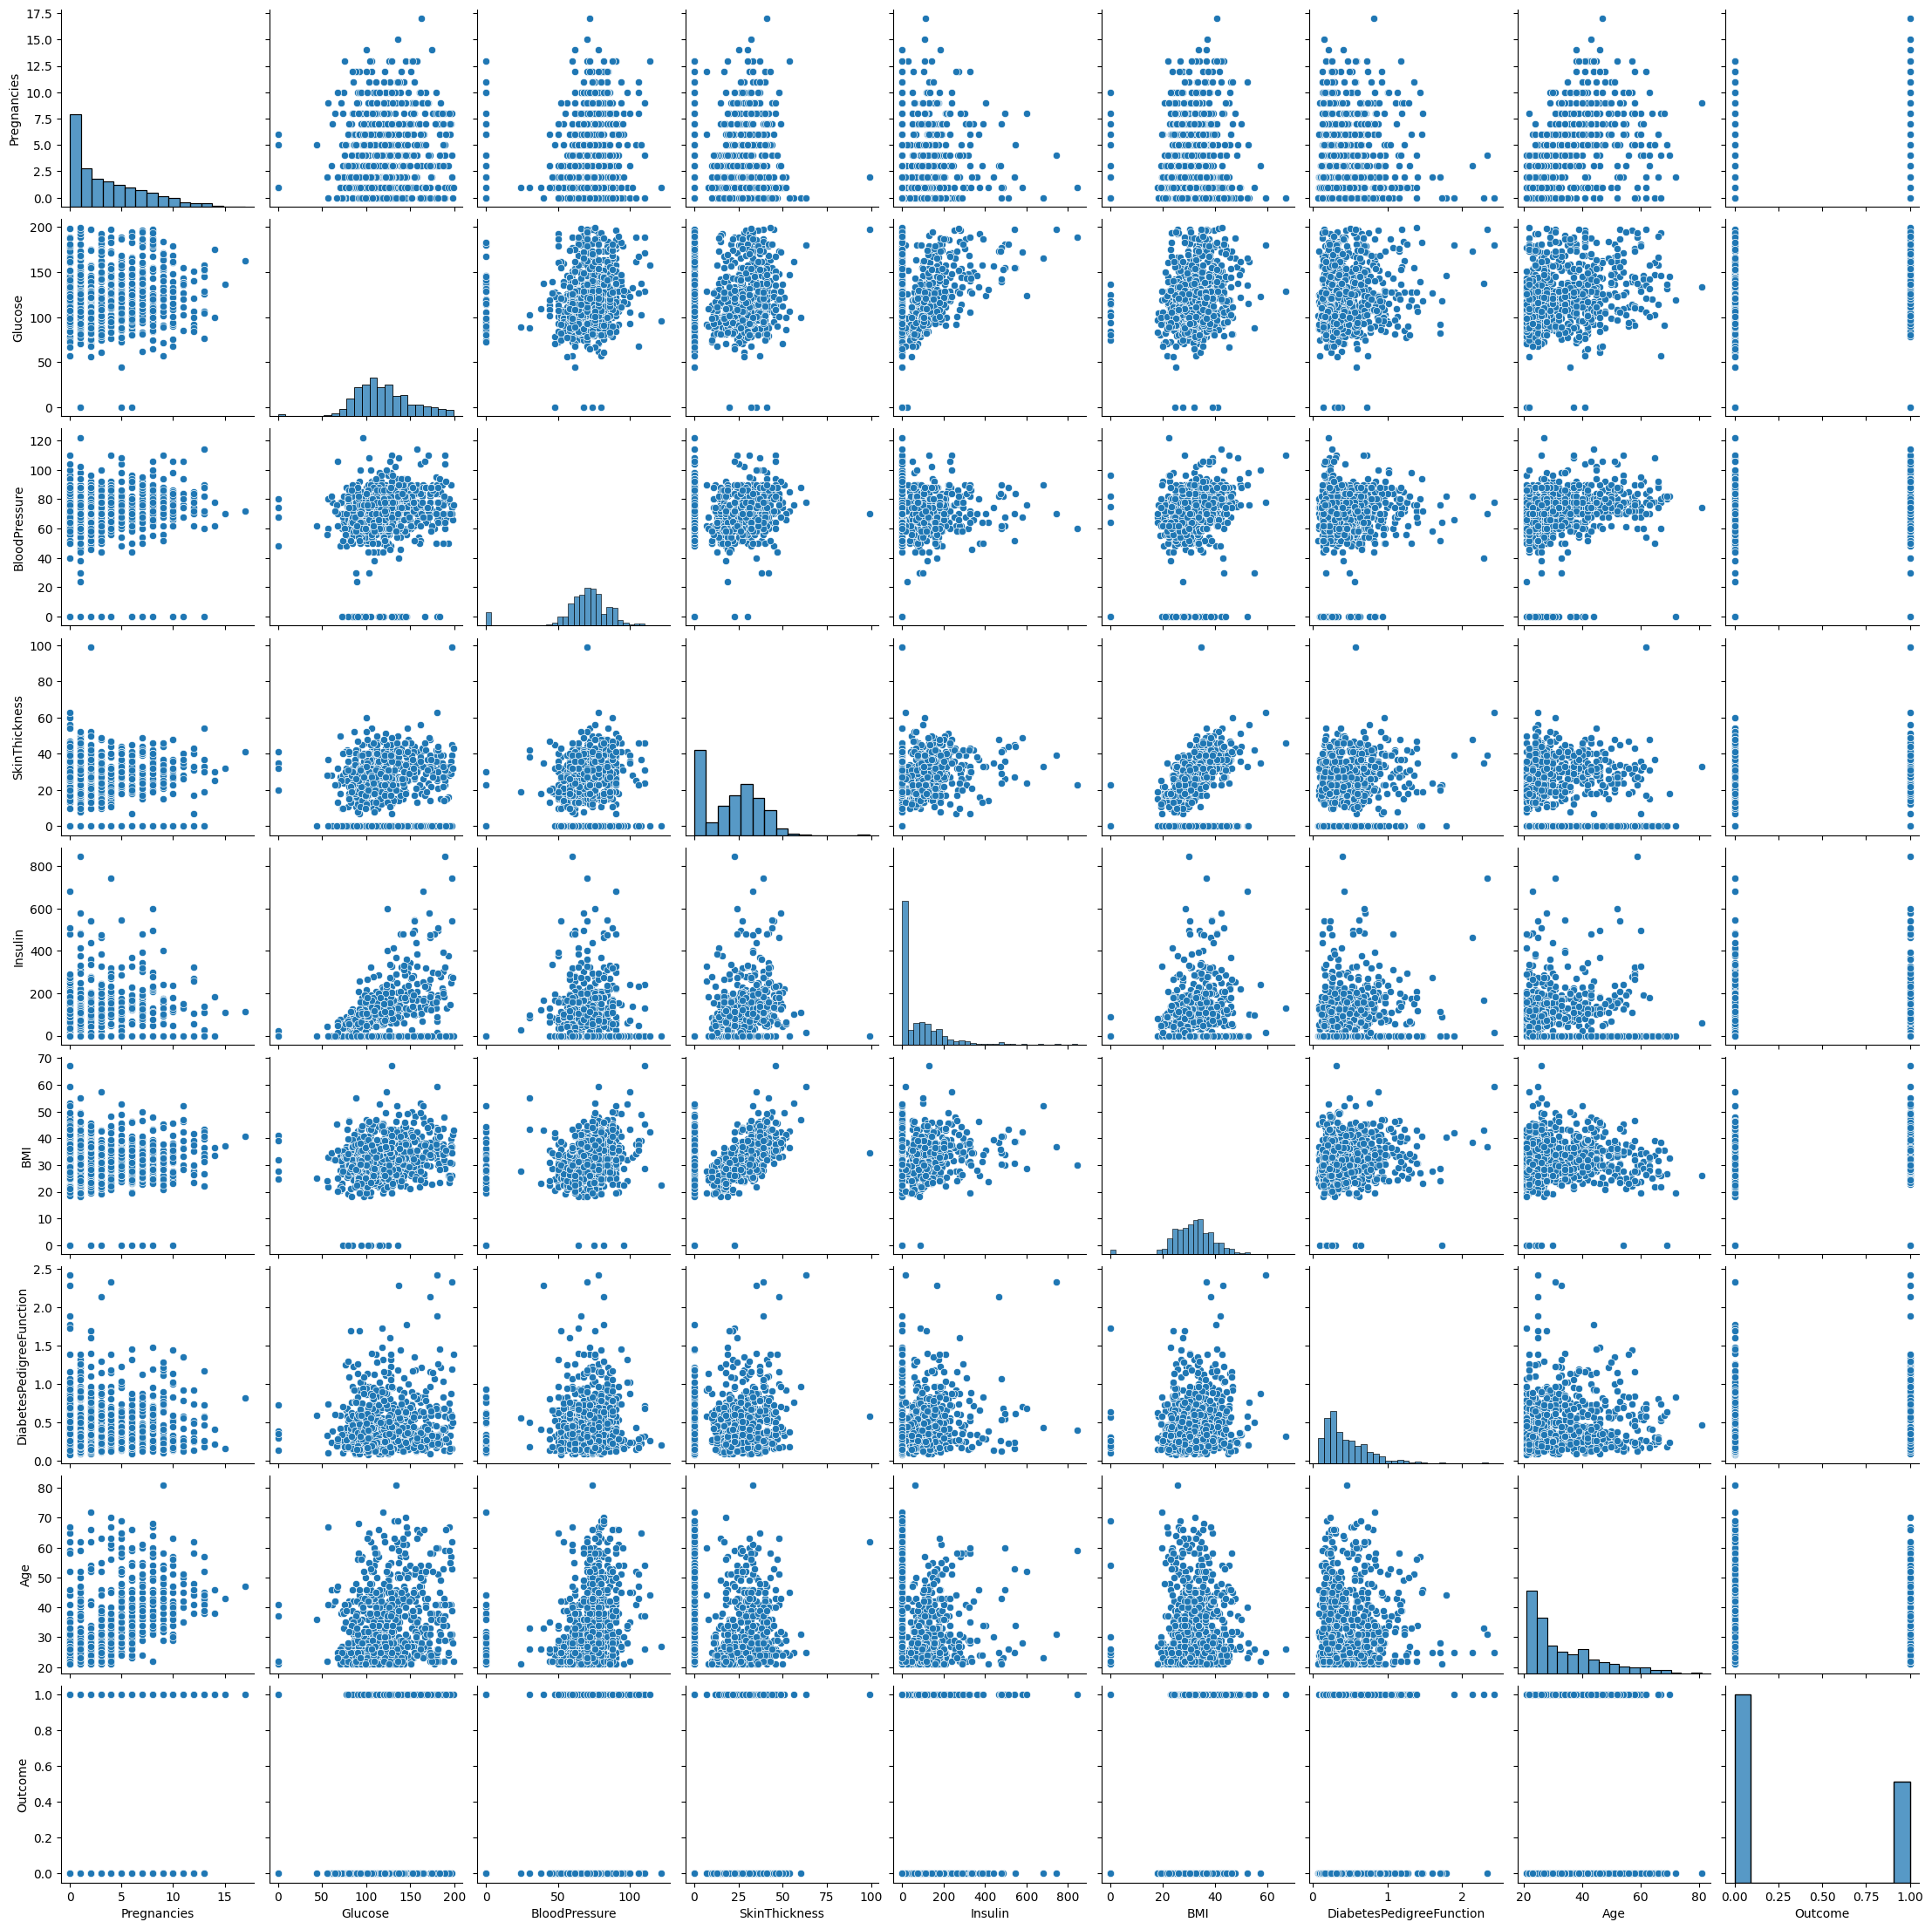

In [4]:
import seaborn as sns
sns.pairplot(df)

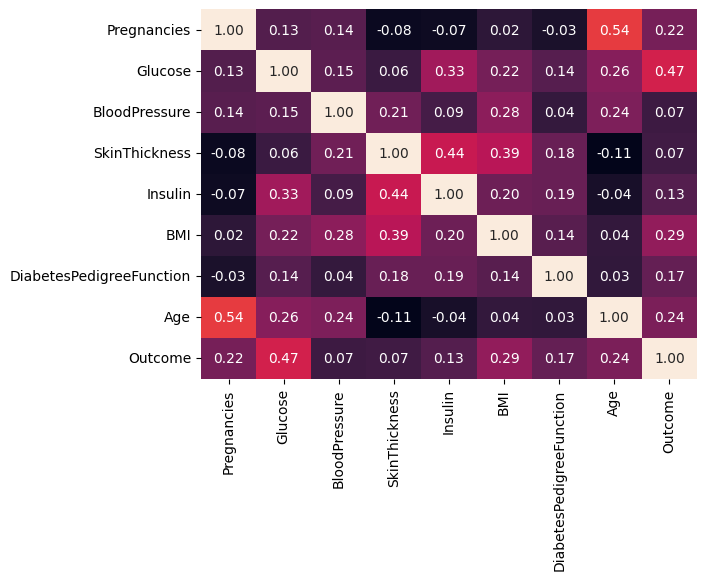

In [5]:
import matplotlib.pyplot as plt

sns.heatmap(df.corr(), annot = True,fmt=".2f",cbar=False)
plt.show()



In [7]:
X = df.drop('Outcome', axis=1)
y = df['Outcome']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


print(X_train.head())



     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
60             2       84              0              0        0   0.0   
618            9      112             82             24        0  28.2   
346            1      139             46             19       83  28.7   
294            0      161             50              0        0  21.9   
231            6      134             80             37      370  46.2   

     DiabetesPedigreeFunction  Age  
60                      0.304   21  
618                     1.282   50  
346                     0.654   22  
294                     0.254   65  
231                     0.238   46  


In [8]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


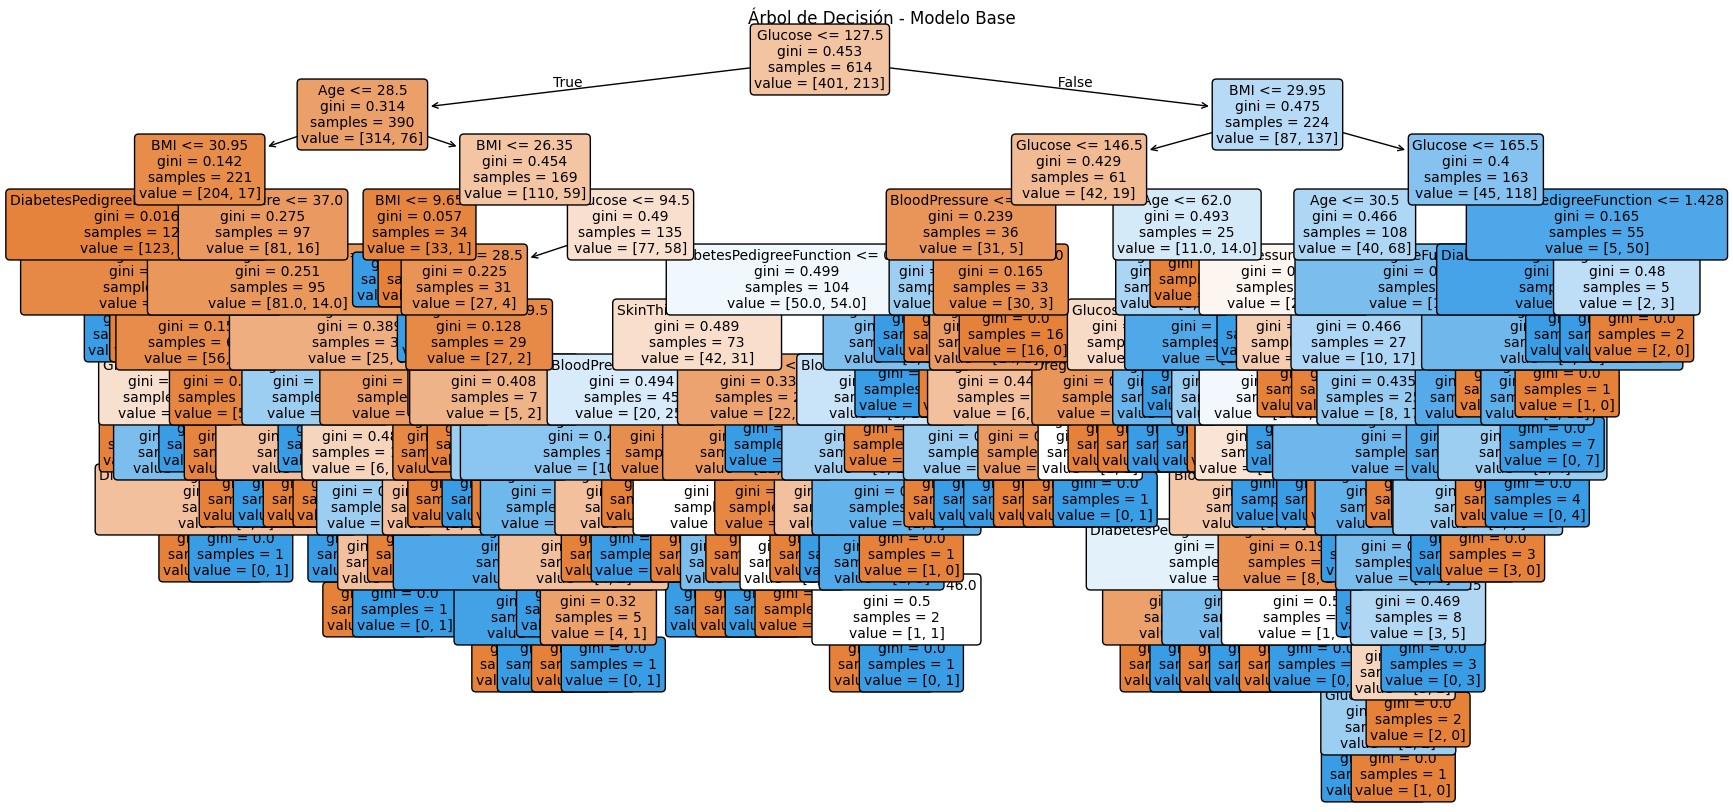

In [12]:

import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(20,10))
plot_tree(
    model,  # modelo base entrenado con DecisionTreeClassifier
    feature_names=X.columns,
    filled=True,
    rounded=True,
    fontsize=10
)
plt.title("Árbol de Decisión - Modelo Base")
plt.show()


In [13]:
from sklearn.metrics import accuracy_score

# Predicciones del modelo base
y_pred = model.predict(X_test)

# Cálculo del accuracy
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy del modelo:", accuracy)


Accuracy del modelo: 0.7467532467532467


In [14]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

# Grilla de hiperparámetros
param_grid = {
    'max_depth': [3, 5, 7, None],
    'min_samples_split': [2, 5, 10],
    'criterion': ['gini', 'entropy']
}

# Configurar GridSearchCV
grid_search = GridSearchCV(
    estimator=DecisionTreeClassifier(random_state=42),
    param_grid=param_grid,
    cv=5,
    scoring='accuracy'
)

# Entrenar búsqueda en datos de entrenamiento
grid_search.fit(X_train, y_train)

# Mejor combinación
print("Mejores parámetros:", grid_search.best_params_)


Mejores parámetros: {'criterion': 'gini', 'max_depth': 3, 'min_samples_split': 2}


In [15]:
from sklearn.metrics import accuracy_score

# Predicciones con el modelo optimizado
y_pred_opt = grid_search.best_estimator_.predict(X_test)

# Cálculo del accuracy
accuracy_opt = accuracy_score(y_test, y_pred_opt)

print("Accuracy del modelo optimizado:", accuracy_opt)


Accuracy del modelo optimizado: 0.7597402597402597


In [17]:

from pickle import dump

# Guardar el modelo optimizado en el directorio actual
dump(grid_search.best_estimator_, open("modelo_diabetes.pkl", "wb"))

